<a href="https://colab.research.google.com/github/mrhallonline/NLP-Workshop/blob/main/NLP_Workshop_NARST_Comparing_MathTalk(NLTK)_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 Introduction to NLP and Overview of modules
The transcript data that we will be using come from Excel files of Whisper AI transcriptions of a high school math class. This data is located in a Google Drive. We will use NLTK, Python, and R Cloud to copy and process the file so that it can be analyzed by you during the workshop. From there we will do some basic processing and analysis to extract specific features that might offer us some basic insights about teacher influence on student "math talk" during the transcribed math class.

It is important to understand that while the tools we are using today offer some insight into our research question, researcher involvement is integral to the analysis.

We will be extracting the text from the column labeled transcript. Currently there is more noise than signal if we were using this whole file as our data corpus. It is also important to note that we rarely ever interact with or alter our raw data corpus. We will extract specific features to new useful variables. Which can get messy over time if we aren't able to keep up with our ever increasing buckets of transformed data.
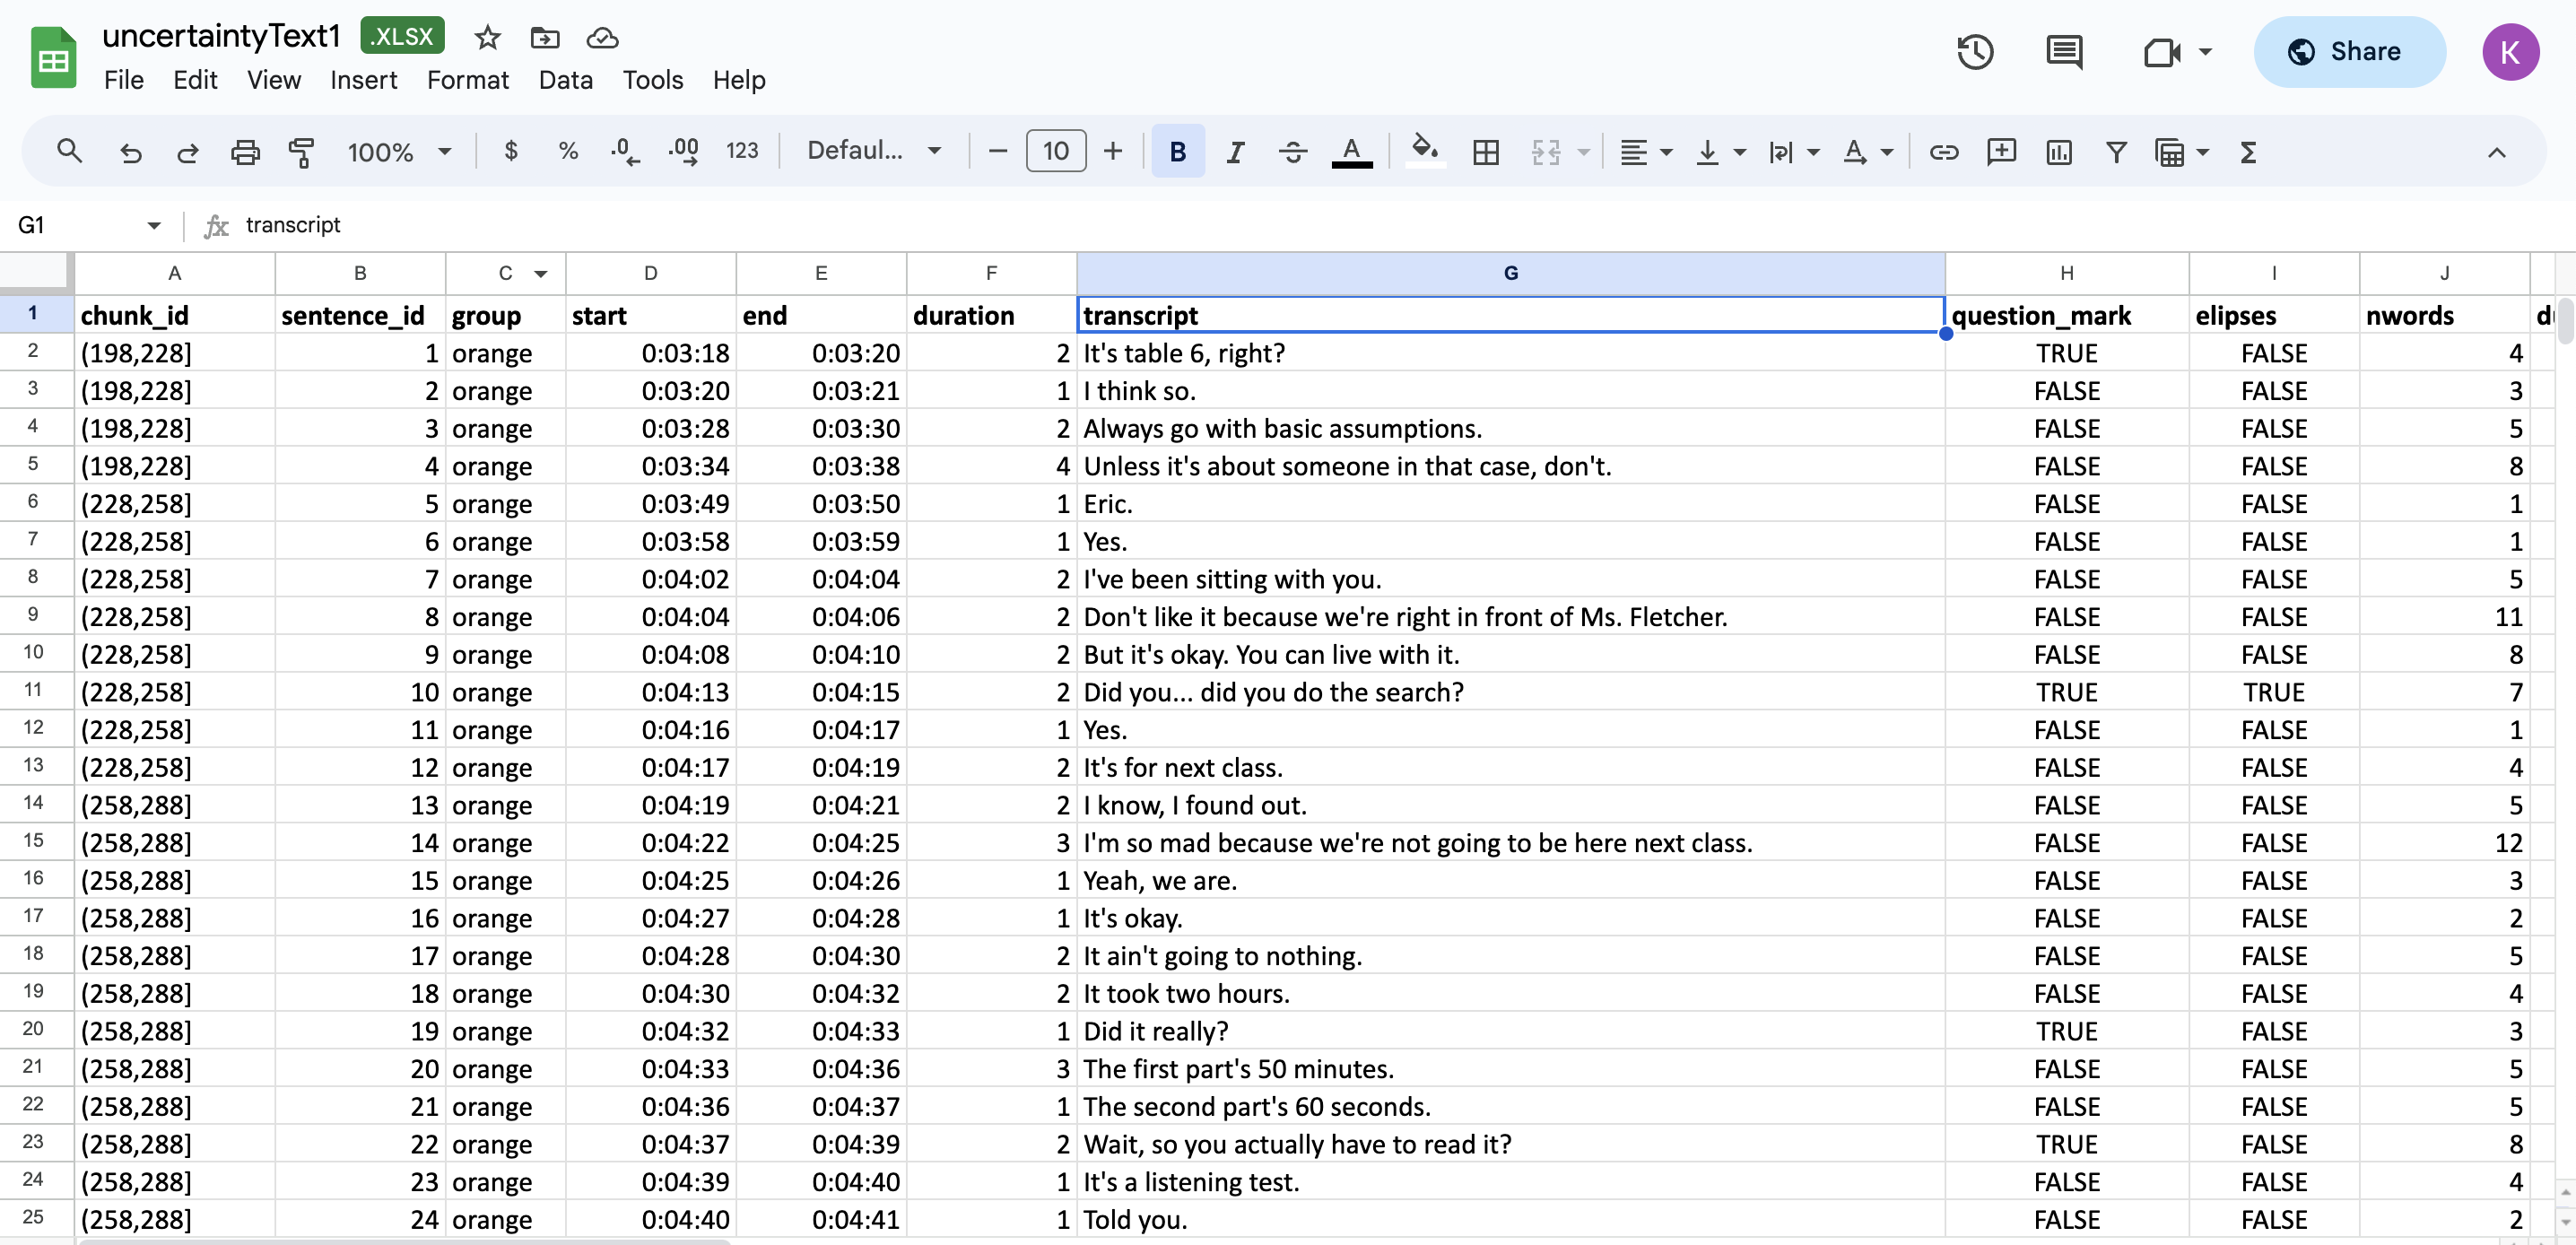



# 1.1 What is Feature Extraction in NLP (Signal vs. Noise)

* Isolating Useful Information: the aim is to isolate the useful or relevant information from a mass of data. In NLP, feature extraction is about selecting only those aspects of the data that are useful for a particular task (e.g., sentiment analysis, machine translation, etc.). For example the time stamps are important for finding specific sections within a video file, but the numeric data would be overwhelming if lumped with our transcript text when looking at certain features such as token frequencies.

* Improving Accuracy: Removing irrelevant features in NLP usually leads to better results, more accurate machine learning models.

* Optimization: Iterative process, requiring several rounds of refinement to optimize performance.

* Sometimes noise is signal and sometimes signal is actually noise in natural language processing. We will see this in module 2 when looking at capitalization as a useful feature as compared to times during text preprocessing when it is often more noise than signal. Extracting features can lead to the loss of others. (In the transcript pauses are noted by elipses, which can be lost when extracting certain character types. This is also true for question marks)


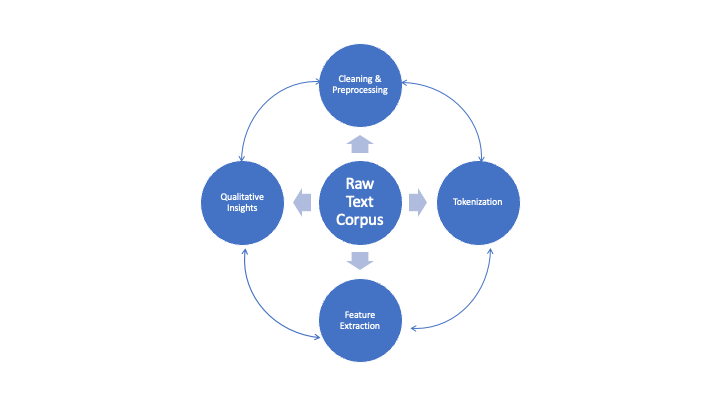

# 1.2 Interacting with Google Colab
## This is a text cell  
* Instructions or explanations will be found in text cells.
* They will normally give explanations about the subsequent code cell.
* You should make a copy of the notebook you are using so that you have the ability to save your changes if you would like.

In [ ]:
# This is a code cell
# When you click the execute button it will spin as it processes the code then it will normally generate an output just below the cell
# This simple code will check what version of Python is currently being run by Google Colab
# When you click this cell the output should say something similar "Python 3.10.12"

!python --version

Python 3.10.12


# 1.3 Installing NLTK and Python supporting dependencies, packages and libraries using Google Colab.

Clicking the code cell play button below will install all the following libraries that we will use throughout this workshop which include:

* Natural Language Toolkit (NLTK)
* Matplotlib library: Library for creating data visualizations.
* Numpy
* Pandas

In [ ]:
# Clicking the code cell play button below will download and install all the following libraries
# This normally takes around ~1 minute and each step will show up in the output below.
%pip install nltk
%pip install requests
%pip install matplotlib
%pip install numpy

# New Section

# 2.0 Import All files locally
Clicking the next code cell will automatically download the seven files containing our data and save it locally so it can be accessed during this Colab workshop.

You can also start with other file types such as pdfs or json files, we are starting with an Excel file because the transcript data that we have was output this way when we did automatic speech recognition (ASR) on the original audio file.

* The seven text files will show in your folder several seconds after running the code cell or will give you an error.

* We will be extracting the text from the column labeled transcript.

In [ ]:
import requests
# Group 1 = https://drive.google.com/file/d/1ru4cZuynsZuG8Wne-omg06lLDgexQuZA/view?usp=drive_link
# Group 2 = https://drive.google.com/file/d/1DliCzf3tUydb8HXpUqnsggP5LtUYKyrI/view?usp=drive_link
# Group 3 = https://drive.google.com/file/d/1rM74ceywb_BPaqt-CJlkhT7MQ45vlyiJ/view?usp=sharing
# Group 4 = https://drive.google.com/file/d/1E-cGPSzM9Dyqd95KhdVbRGSx_E4CjosO/view?usp=sharing
# Group 5 = https://drive.google.com/file/d/1GPkZCkbgAOplckKY_VvIKfeP7ShxJ8Sz/view?usp=sharing
# Group 6 = https://drive.google.com/file/d/1JnM-tMt-1w_YDaGkeNJmRZL6Ld_6A3oF/view?usp=sharing
# Group 7 = https://drive.google.com/file/d/1XzUjN7C0U_U9PSj4OTd-80niwRjXKI4l/view?usp=drive_link

# Define a list of file IDs from Google Drive and corresponding local filenames
files_info = [
    {"id": "1ru4cZuynsZuG8Wne-omg06lLDgexQuZA", "local_name": "mathTalk_file1.txt"},
    {"id": "1DliCzf3tUydb8HXpUqnsggP5LtUYKyrI", "local_name": "mathTalk_file2.txt"},
    {"id": "1rM74ceywb_BPaqt-CJlkhT7MQ45vlyiJ", "local_name": "mathTalk_file3.txt"},
    {"id": "1E-cGPSzM9Dyqd95KhdVbRGSx_E4CjosO", "local_name": "mathTalk_file4.txt"},
    {"id": "1GPkZCkbgAOplckKY_VvIKfeP7ShxJ8Sz", "local_name": "mathTalk_file5.txt"},
    {"id": "1JnM-tMt-1w_YDaGkeNJmRZL6Ld_6A3oF", "local_name": "mathTalk_file6.txt"},
    {"id": "1XzUjN7C0U_U9PSj4OTd-80niwRjXKI4l", "local_name": "mathTalk_file7.txt"}
]

for file_info in files_info:
    # Construct the download URL
    download_url = f"https://docs.google.com/uc?export=download&id={file_info['id']}"

    # Send a GET request to the download URL
    response = requests.get(download_url)

    # Check if the request was successful
    if response.status_code == 200:
        # Write the content to a local file as text
        with open(file_info['local_name'], "w", encoding='utf-8') as f:
            f.write(response.text)
        print(f"File downloaded and saved as {file_info['local_name']}")
    else:
        print(f"Failed to download the file with ID {file_info['id']}. Check the URL and permissions.")


File downloaded and saved as mathTalk_file1.txt
File downloaded and saved as mathTalk_file2.txt
File downloaded and saved as mathTalk_file3.txt
File downloaded and saved as mathTalk_file4.txt
File downloaded and saved as mathTalk_file5.txt
File downloaded and saved as mathTalk_file6.txt
File downloaded and saved as mathTalk_file7.txt


## Looking at Stop Words

# 2.1 Tokenization and Text Processing Across Corpora
The fundamental step of natural language processing is the pre-processing phase, which includes text normalization and tokenization. Text pre-processing works to decreases the amount of noise found in a data corpus, leaving us with a higher concentration of useful data for analysis.

For example without lowercasing and punctuation removal you could end up with numerous token duplications depening on where a word is found throughout a sentence,

such as: "Equation", "equation", "equation;", "equation?"

whereas the tokenization process converts unstructured characters of a text corpus (string of characters), into discrete structured machine recognizable elements (lists) such as words and sentences.

Running the following code cell will do a quick preprocessing of the the seven text files using the following sequence of steps.

1. Convert all sentences found in the text files to sentence tokens.
2. Normalize those sentence tokens by lowercasing, removing punctuation marks, non-alphanumeric characters, and stop words.
3. Tokenize the remaining words to word tokens and NLTK text objects
4. Placing all of these conversions and tokenized objects into a dictionary that we can pull from called "all results".

This quick normalization is not without error and far from perfect. After lowercasing for example many proper nouns are no longer obvious. Brown --> brown

Also normalized sentences are difficult to clearly understand due to the loss of stop words and punctuation.

# need to add cleaned sentences and fix the graphic names

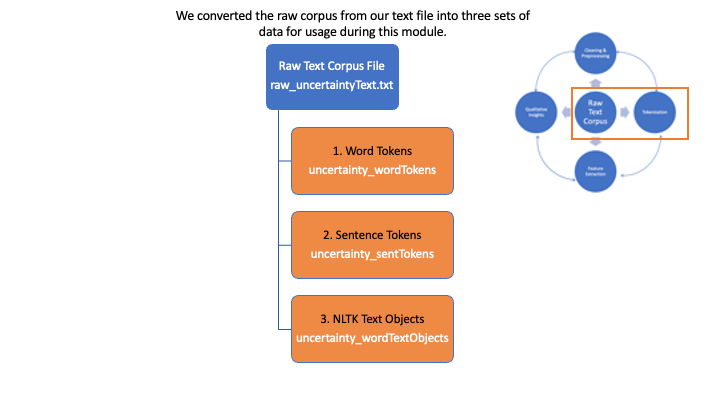

In [ ]:
import os
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

nltk.download('punkt')
nltk.download('stopwords')

# Function to process a file
def process_file(filename, output_filename):
    results = {}  # Dictionary to store results
    try:
        # Open and read the text file
        with open(filename, 'rt', encoding='utf-8', errors='replace') as file:
            raw_text = file.read()

        # Sentence tokenization from raw text
        sent_tokens = sent_tokenize(raw_text)

        # Containers for cleaned data
        cleaned_sent_tokens = []
        removed_elements = {'punctuation': [], 'non_alpha': [], 'stop_words': []}

        # Process each sentence
        for sentence in sent_tokens:
            # Convert to lower case
            words = word_tokenize(sentence.lower())

            # Remove non-alphabetic tokens and filter out stop words
            cleaned_words = []
            for word in words:
                if word.isalpha():
                    if word not in stopwords.words('english'):
                        cleaned_words.append(word)
                    else:
                        removed_elements['stop_words'].append(word)
                else:
                    removed_elements['non_alpha'].append(word)
                    if any(char in string.punctuation for char in word):
                        removed_elements['punctuation'].append(word)

            # Join the cleaned words back into a sentence
            cleaned_sentence = ' '.join(cleaned_words)
            cleaned_sent_tokens.append(cleaned_sentence)

        # Write the cleaned sentences to the file
        os.makedirs(os.path.dirname(output_filename), exist_ok=True)
        with open(output_filename, 'w', encoding='utf-8') as file:
            for sentence in cleaned_sent_tokens:
                file.write(sentence + '\n')

        # Generate word tokens and text objects from cleaned sentences
        cleaned_text = ' '.join(cleaned_sent_tokens)
        word_tokens = word_tokenize(cleaned_text)
        text_objects = nltk.Text(word_tokens)

        # Store results in the dictionary
        file_key = os.path.basename(filename).split('.')[0]  # Use filename without extension as key
        results[file_key] = {
            'sentence_tokens': sent_tokens,  # Include original sentence tokens
            'cleaned_sentences': cleaned_sent_tokens,
            'word_tokens': word_tokens,
            'text_objects': text_objects,
            'removed_elements': removed_elements
        }

        return results

    except FileNotFoundError:
        print(f"Error: The file '{filename}' was not found. Check the file path.")
        return {}
    except Exception as e:
        print(f"An error occurred: {e}")
        return {}

# List of file paths and their output paths
files_to_process = [
    # Update these paths to match your actual file locations
    ('/content/mathTalk_file1.txt', 'output/normalized_mathTalk_file1.txt'),
    ('/content/mathTalk_file2.txt', 'output/normalized_mathTalk_file2.txt'),
    ('/content/mathTalk_file3.txt', 'output/normalized_mathTalk_file3.txt'),
    ('/content/mathTalk_file4.txt', 'output/normalized_mathTalk_file4.txt'),
    ('/content/mathTalk_file5.txt', 'output/normalized_mathTalk_file5.txt'),
    ('/content/mathTalk_file6.txt', 'output/normalized_mathTalk_file6.txt'),
    ('/content/mathTalk_file7.txt', 'output/normalized_mathTalk_file7.txt'),
    # Add other files here...
]

# Dictionary to hold all results
all_results = {}

# Initialize a dictionary to hold all word tokens for each corpus
all_word_tokens = {}

# Extract word tokens from each result in all_results and store them in all_word_tokens
for file_key, result in all_results.items():
    all_word_tokens[file_key] = result['word_tokens']

# At this point, all_word_tokens will have file keys as keys and lists of word tokens as values


# Process each file
for filename, output_filename in files_to_process:
    results = process_file(filename, output_filename)
    all_results.update(results)

# Now, `all_results` contains distinct names (keys) for each file and its respective outputs below we will name them for further usage.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## 2.1 New alternate 2.1 with lemmatization

In [ ]:
import os
import nltk
import string
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')  # For POS tagging, required for better lemmatization

# Function to convert NLTK's POS tags to WordNet's POS tags
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if POS tag is unclear

# Function to process a file
def process_file(filename, output_filename):
    results = {}  # Dictionary to store results
    lemmatizer = WordNetLemmatizer()  # Initialize lemmatizer

    try:
        # Open and read the text file
        with open(filename, 'rt', encoding='utf-8', errors='replace') as file:
            raw_text = file.read()

        # Sentence tokenization from raw text
        sent_tokens = sent_tokenize(raw_text)

        # Containers for cleaned data
        cleaned_sent_tokens = []
        removed_elements = {'punctuation': [], 'non_alpha': [], 'stop_words': []}

        # Process each sentence
        for sentence in sent_tokens:
            # Convert to lower case and tokenize
            words = word_tokenize(sentence.lower())
            # Get POS tags for words to improve lemmatization
            pos_tags = nltk.pos_tag(words)

            cleaned_words = []
            for word, tag in zip(words, pos_tags):
                wn_tag = get_wordnet_pos(tag[1])
                if word.isalpha():
                    if word not in stopwords.words('english'):
                        # Lemmatize word with appropriate POS tag
                        lemma_word = lemmatizer.lemmatize(word, wn_tag)
                        cleaned_words.append(lemma_word)
                    else:
                        removed_elements['stop_words'].append(word)
                else:
                    removed_elements['non_alpha'].append(word)
                    if any(char in string.punctuation for char in word):
                        removed_elements['punctuation'].append(word)

            # Join the cleaned words back into a sentence
            cleaned_sentence = ' '.join(cleaned_words)
            cleaned_sent_tokens.append(cleaned_sentence)

        # Write the cleaned sentences to the file
        os.makedirs(os.path.dirname(output_filename), exist_ok=True)
        with open(output_filename, 'w', encoding='utf-8') as file:
            for sentence in cleaned_sent_tokens:
                file.write(sentence + '\n')

        # Generate word tokens and text objects from cleaned sentences
        cleaned_text = ' '.join(cleaned_sent_tokens)
        word_tokens = word_tokenize(cleaned_text)
        text_objects = nltk.Text(word_tokens)

        # Store results in the dictionary
        file_key = os.path.basename(filename).split('.')[0]  # Use filename without extension as key
        results[file_key] = {
            'sentence_tokens': sent_tokens,
            'cleaned_sentences': cleaned_sent_tokens,
            'word_tokens': word_tokens,
            'text_objects': text_objects,
            'removed_elements': removed_elements
        }

        return results

    except FileNotFoundError:
        print(f"Error: The file '{filename}' was not found. Check the file path.")
        return {}
    except Exception as e:
        print(f"An error occurred: {e}")
        return {}

# List of file paths and their output paths
files_to_process = [
    # Update these paths to match your actual file locations
    ('/content/mathTalk_file1.txt', 'output/normalized_mathTalk_file1.txt'),
    ('/content/mathTalk_file2.txt', 'output/normalized_mathTalk_file2.txt'),
    ('/content/mathTalk_file3.txt', 'output/normalized_mathTalk_file3.txt'),
    ('/content/mathTalk_file4.txt', 'output/normalized_mathTalk_file4.txt'),
    ('/content/mathTalk_file5.txt', 'output/normalized_mathTalk_file5.txt'),
    ('/content/mathTalk_file6.txt', 'output/normalized_mathTalk_file6.txt'),
    ('/content/mathTalk_file7.txt', 'output/normalized_mathTalk_file7.txt'),
    # Add other files here...
]

# Dictionary to hold all results
all_results = {}

# Initialize a dictionary to hold all word tokens for each corpus
all_word_tokens = {}

# Extract word tokens from each result in all_results and store them in all_word_tokens
for file_key, result in all_results.items():
    all_word_tokens[file_key] = result['word_tokens']

# At this point, all_word_tokens will have file keys as keys and lists of word tokens as values

# Process each file
for filename, output_filename in files_to_process:
    results = process_file(filename, output_filename)
    all_results.update(results)

# Now, `all_results` contains distinct names (keys) for each file and its respective outputs below we will name them for further usage.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# 2.11 Parsing our Removed Data

Text cleaning is a critical step in Natural Language Processing (NLP) that involves removing unnecessary and irrelevant elements from the text to ensure the data is neat and ready for further analysis. This process enhances the accuracy of our models and analyses by focusing on the meaningful content of the text.

For each corpus processed, we have identified and removed three main types of "noisy" elements:

1. Stop Words: 50-100 most common words that carry "minimal meaningful information" (e.g., "the", "is", "at") and are usually removed in the preprocessing phase to reduce the dataset size and improve processing time.
2. Non-Alphabetic Tokens: Any characters or groups of characters that do not contribute to the semantic meaning of the text, such as numbers and special characters.
3. Punctuation: Symbols that are not part of the words themselves but are used in the structure of the sentences. Removing punctuation helps in focusing on the textual content without the influence of sentence structure markers.

As stated before though text cleaning can lead to problems of data loss and context loss if removed words are actually part of the "signal" that we are analyzing. For example, sometimes stop words carry more than "minimal meaningful information" and might actually be crucial components of your research question. For example, if your question was about differences in pedagogical agency in high school math groups (i.e., how responsibility for pedagogical decision-making is indexed differently) in processing transcripts of group conversations, modal verbs like “should” vs. “could” vs. “might” vs. “must” contribute significantly to differences in that indexing (Martin, 2016). In this case we would want to exclude words denoting agency from the list of stop words.

Therefore, understanding what has been removed is as crucial as knowing what remains, as it ensures that no significant information is inadvertently discarded during preprocessing. Using the following code we can  present the unique elements removed from each corpus under these categories. This peak into the removal bin allows us to see what we have discarded, inadvertantly or otherwise.

In [ ]:
# After processing all files, print all removed elements for each
for file_key, result in all_results.items():
    removed_stop_words = result['removed_elements']['stop_words']
    removed_non_alpha = result['removed_elements']['non_alpha']
    removed_punctuation = result['removed_elements']['punctuation']

    # To see unique elements removed
    unique_stop_words = set(removed_stop_words)
    unique_non_alpha = set(removed_non_alpha)
    unique_punctuation = set(removed_punctuation)

    print(f"From {file_key}:")
    print(f"  Unique stop words removed: {unique_stop_words}")
    print(f"  Unique non-alphabetic tokens removed: {unique_non_alpha}")
    print(f"  Unique punctuation removed: {unique_punctuation}")
    print("\n")  # Add a newline for better readability between files

From mathTalk_file1:
  Unique stop words removed: {'with', 'them', 'there', 'those', 'that', 'or', 'and', 'only', 'we', 'i', 'do', 'some', 'her', 'here', 'be', 'an', 'by', 'until', 'for', 'then', 'should', 'what', 'the', 'me', 'did', 'more', 'how', 'but', 'again', 'not', 'over', 'both', 'off', 'my', 'it', 'which', 'your', 'why', 'during', 'you', 'doing', 'on', 'as', 'she', 'these', 'been', 'up', 'other', 'our', 'can', 'itself', 'than', 'have', 'a', 'through', 'at', 'from', 'about', 'does', 'to', 'are', 'this', 'of', 'so', 'was', 'out', 'into', 'same', 'before', 'were', 'in', 'no', 'very', 'if', 'y', 'they', 'once', 'when', 'just', 'is', 'had', 'all', 'too', 'now', 'yours', 'because'}
  Unique non-alphabetic tokens removed: {'...', 'c.', '20', "'m", '4.61', ',', '5', 'c2e2', '4.62', '30x', "'s", '57', '0', '5.30', '10.30', '.', "'re", "'ll", "n't", '2', '?', 'ok.', 'nv6', '12', '4.6', '30', '7', "'ve", 'mm-hmm', '!'}
  Unique punctuation removed: {'...', 'c.', "'m", '4.61', ',', '4.62',

#2.2 Pulling Important Data from our Dictionary
Our numerous text corpora now all reside in one dictionary with multiple sections from which we can pull information to look at.

Running the code cell below will result in us pulling the following token types for each of our seven corpora.
1. word tokens - formed from decomposing sentences into their constituent pieces.
2. NLTK text objects - The NLTK library has a unique tokenizer that adds additional metadata to the word token which allows for unique analysis as compared to normal word tokens.
3. original sentence tokens - based on numerous features, but normally bounded by punctuation marks. This is why we normally tokenize this first before other text processing.
4. normalized sentence tokens - original sentence tokens that have been lowercased, and had stop words, punctuations, and special chracters removed.

You can always figure out what type of data corpus you are dealing with by running these print checks. It is also extremely important to also note the importance of keeping your documents categorized, lest they get out of control. The more processing and feature extractions you do, the more you may end up with more different buckets of data to keep up with.
* We will look at the utility of each token type in these modules

In [ ]:

#word tokens in variables for each corpus
word_tokens_corpus1 = all_results['mathTalk_file1']['word_tokens']
word_tokens_corpus2 = all_results['mathTalk_file2']['word_tokens']
word_tokens_corpus3 = all_results['mathTalk_file3']['word_tokens']
word_tokens_corpus4 = all_results['mathTalk_file4']['word_tokens']
word_tokens_corpus5 = all_results['mathTalk_file5']['word_tokens']
word_tokens_corpus6 = all_results['mathTalk_file6']['word_tokens']
word_tokens_corpus7 = all_results['mathTalk_file7']['word_tokens']

# NLTK text_objects in variables for each corpus
text_objects_corpus1 = all_results['mathTalk_file1']['text_objects']
text_objects_corpus2 = all_results['mathTalk_file2']['text_objects']
text_objects_corpus3 = all_results['mathTalk_file3']['text_objects']
text_objects_corpus4 = all_results['mathTalk_file4']['text_objects']
text_objects_corpus5 = all_results['mathTalk_file5']['text_objects']
text_objects_corpus6 = all_results['mathTalk_file6']['text_objects']
text_objects_corpus7 = all_results['mathTalk_file7']['text_objects']

# sentence tokens in variables for each corpus
sentence_tokens_corpus1 = all_results['mathTalk_file1']['sentence_tokens']
sentence_tokens_corpus2 = all_results['mathTalk_file2']['sentence_tokens']
sentence_tokens_corpus3 = all_results['mathTalk_file3']['sentence_tokens']
sentence_tokens_corpus4 = all_results['mathTalk_file4']['sentence_tokens']
sentence_tokens_corpus5 = all_results['mathTalk_file5']['sentence_tokens']
sentence_tokens_corpus6 = all_results['mathTalk_file6']['sentence_tokens']
sentence_tokens_corpus7 = all_results['mathTalk_file7']['sentence_tokens']

# cleaned sentence in variables for each corpus
normalized_sentences_corpus1 = all_results['mathTalk_file1']['cleaned_sentences']
normalized_sentences_corpus2 = all_results['mathTalk_file2']['cleaned_sentences']
normalized_sentences_corpus3 = all_results['mathTalk_file3']['cleaned_sentences']
normalized_sentences_corpus4 = all_results['mathTalk_file4']['cleaned_sentences']
normalized_sentences_corpus5 = all_results['mathTalk_file5']['cleaned_sentences']
normalized_sentences_corpus6 = all_results['mathTalk_file6']['cleaned_sentences']
normalized_sentences_corpus7 = all_results['mathTalk_file7']['cleaned_sentences']


print("word_tokens_corpus1 is a: ",type(word_tokens_corpus1), "containing  ",len(word_tokens_corpus1), "tokens")
print("text_objects_corpus1 is a: ",type(text_objects_corpus1), "containing  ",len(text_objects_corpus1), "tokens")
print("sentence_tokens_corpus1 is a: ",type(sentence_tokens_corpus1), "containing  ",len(sentence_tokens_corpus1), "tokens")
print("normalized_sentences_corpus1 is a: ",type(normalized_sentences_corpus1), "containing  ",len(normalized_sentences_corpus1), "tokens")

print(sorted(set(word_tokens_corpus1[0:5])))
print(sorted(set(text_objects_corpus1[0:5])))
print(sorted(set(sentence_tokens_corpus1[0:5])))
print(sorted(set(normalized_sentences_corpus1[0:5])))

word_tokens_corpus1 is a:  <class 'list'> containing   687 tokens
text_objects_corpus1 is a:  <class 'nltk.text.Text'> containing   687 tokens
sentence_tokens_corpus1 is a:  <class 'list'> containing   230 tokens
normalized_sentences_corpus1 is a:  <class 'list'> containing   230 tokens
['bit', 'little', 'review', 'want', 'yes']
['bit', 'little', 'review', 'want', 'yes']
['Can I review for a little bit?', 'Did you want to do it like during...', "It's a tea.", 'OK.\nYeah.', 'Yes!']
['review little bit', 'tea', 'want like', 'yeah', 'yes']


# 2.3 Looking at our Text Corpora

# New Section

# **3.0** Token Frequency Analysis (TFA)
In the context of analyzing classroom environment transcripts analyzing the frequency that tokens occur can give us insights into uncovering patterns, trends, and themes that show up in the verbal interactions of the participants involved. This involves quantifying the occurence of specific words or phrase tokens throughout the text.

# 3.1 Average Sentence Length
Average Sentence Length uses the total number of words and total number of sentences
in a corpus to calculate exactly what it says: the average sentence length.
While the equation is very basic and straightforward it provides information that can
be used to infer, for example, how complex sentences are on average throughout a
given text corpus.

In [ ]:
print("Group 1:")
print("Number of sentences:", len(sentence_tokens_corpus1))
print("Number of word tokens:", len(word_tokens_corpus1))
# Calculate the average sentence length
average_sentence_length_group1 = (len(word_tokens_corpus1) / len(sentence_tokens_corpus1))
print("Average sentence length for Group 1 is:", average_sentence_length_group1)

print("\nGroup 2:")
print("Number of sentences:", len(sentence_tokens_corpus2))
print("Number of word tokens:", len(word_tokens_corpus2))
# Calculate the average sentence length
average_sentence_length_group2 = (len(word_tokens_corpus2) / len(sentence_tokens_corpus2))
print("Average sentence length for Group 2 is:", average_sentence_length_group2)

print("\nGroup 3:")
print("Number of sentences:", len(sentence_tokens_corpus3))
print("Number of word tokens:", len(word_tokens_corpus3))
# Calculate the average sentence length
average_sentence_length_group3 = (len(word_tokens_corpus3) / len(sentence_tokens_corpus3))
print("Average sentence length for Group 3 is:", average_sentence_length_group3)

print("\nGroup 4:")
print("Number of sentences:", len(sentence_tokens_corpus4))
print("Number of word tokens:", len(word_tokens_corpus4))
# Calculate the average sentence length
average_sentence_length_group4 = (len(word_tokens_corpus4) / len(sentence_tokens_corpus4))
print("Average sentence length for Group 4 is:", average_sentence_length_group4)

print("\nGroup 5:")
print("Number of sentences:", len(sentence_tokens_corpus5))
print("Number of word tokens:", len(word_tokens_corpus5))
# Calculate the average sentence length
average_sentence_length_group5 = (len(word_tokens_corpus5) / len(sentence_tokens_corpus5))
print("Average sentence length for Group 5 is:", average_sentence_length_group5)

print("\nGroup 6:")
print("Number of sentences:", len(sentence_tokens_corpus6))
print("Number of word tokens:", len(word_tokens_corpus6))
# Calculate the average sentence length
average_sentence_length_group6 = (len(word_tokens_corpus6) / len(sentence_tokens_corpus6))
print("Average sentence length for Group 6 is:", average_sentence_length_group6)

print("\nGroup 7:")
print("Number of sentences:", len(sentence_tokens_corpus7))
print("Number of word tokens:", len(word_tokens_corpus7))
# Calculate the average sentence length
average_sentence_length_group7 = (len(word_tokens_corpus7) / len(sentence_tokens_corpus7))
print("Average sentence length for Group 7 is:", average_sentence_length_group7)

# 3.2 Average Word Length Distribution
Another fairly straightforward measure that can provide insight into how long, on average, words are in a given corpus.

In [ ]:
# Average word length
avg_word_length_group1 = sum(len(word) for word in word_tokens_corpus1) / len(word_tokens_corpus1)
avg_word_length_group2 = sum(len(word) for word in word_tokens_corpus2) / len(word_tokens_corpus2)
avg_word_length_group3 = sum(len(word) for word in word_tokens_corpus3) / len(word_tokens_corpus3)
avg_word_length_group4 = sum(len(word) for word in word_tokens_corpus4) / len(word_tokens_corpus4)
avg_word_length_group5 = sum(len(word) for word in word_tokens_corpus5) / len(word_tokens_corpus5)
avg_word_length_group6 = sum(len(word) for word in word_tokens_corpus6) / len(word_tokens_corpus6)
avg_word_length_group7 = sum(len(word) for word in word_tokens_corpus7) / len(word_tokens_corpus7)


print("Average word length for Group 1:", avg_word_length_group1)
print("Average word length for Group 2:", avg_word_length_group2)
print("Average word length for Group 3:", avg_word_length_group3)
print("Average word length for Group 4:", avg_word_length_group4)
print("Average word length for Group 5:", avg_word_length_group5)
print("Average word length for Group 6:", avg_word_length_group6)
print("Average word length for Group 7:", avg_word_length_group7)

# 3.3 Lexical Diversity
Lexical diversity quantifies the variety of unique words found in a document. It produces a numerical measure that indicates how diverse the vocabulary is that is used in a text. Broadly speaking, scores of (0.8 - 1) are considered extremely high and difficult to maintain in typical communicative texts. Scores of 0.4-0.79 are considered moderate to high; most high-quality texts fall in this range. Scores of (0 - 0.39) are considered low lexical diversity and tend to suggest highly specialized or technical language usage (e.g., instruction manuals) or language aimed at young readers. This measure is sensitive to corpus length (longer corpora have more opportunities to repeat words), but comparing lexical diversity scores can allow for quantitative comparison that might suggest potential changes in how the usage of language may differ between groups.

In [ ]:
lexical_diversity_group1 = len(set(word_tokens_corpus1)) / len(word_tokens_corpus1)
lexical_diversity_group2 = len(set(word_tokens_corpus2)) / len(word_tokens_corpus2)
lexical_diversity_group3 = len(set(word_tokens_corpus3)) / len(word_tokens_corpus3)
lexical_diversity_group4 = len(set(word_tokens_corpus4)) / len(word_tokens_corpus4)
lexical_diversity_group5 = len(set(word_tokens_corpus5)) / len(word_tokens_corpus5)
lexical_diversity_group6 = len(set(word_tokens_corpus6)) / len(word_tokens_corpus6)
lexical_diversity_group7 = len(set(word_tokens_corpus7)) / len(word_tokens_corpus7)

print("Lexical diversity for Group 1:", lexical_diversity_group1)
print("Lexical diversity for Group 2:", lexical_diversity_group2)
print("Lexical diversity for Group 3:", lexical_diversity_group3)
print("Lexical diversity for Group 4:", lexical_diversity_group4)
print("Lexical diversity for Group 5:", lexical_diversity_group5)
print("Lexical diversity for Group 6:", lexical_diversity_group6)
print("Lexical diversity for Group 7:", lexical_diversity_group7)

Lexical diversity for Group 1: 0.48326055312954874
Lexical diversity for Group 2: 0.2808626673277144
Lexical diversity for Group 3: 0.3800738007380074
Lexical diversity for Group 4: 0.2059629883481837
Lexical diversity for Group 5: 0.29375718115664495
Lexical diversity for Group 6: 0.24110416217381928
Lexical diversity for Group 7: 0.25559015001415225


# 3.4 Unique Words Over Time
Unique words can be used to identify the frequency of words that appear only once in a given corpus. We can also print a list of these word tokens. Looking at unique words between or across text corpora can allow us to look for the appearances and disappearances of specialized educational terminology over time. To find the frequency (number) of unique words, use the following code:

In [ ]:
unique_words_group1 = set(word_tokens_corpus1)
unique_words_group2 = set(word_tokens_corpus2)
unique_words_group3 = set(word_tokens_corpus3)
unique_words_group4 = set(word_tokens_corpus4)
unique_words_group5 = set(word_tokens_corpus5)
unique_words_group6 = set(word_tokens_corpus6)
unique_words_group7 = set(word_tokens_corpus7)

print("Number of unique words in Group 1:", len(unique_words_group1))
print("Number of unique words in Group 2:", len(unique_words_group2))
print("Number of unique words in Group 3:", len(unique_words_group3))
print("Number of unique words in Group 4:", len(unique_words_group4))
print("Number of unique words in Group 5:", len(unique_words_group5))
print("Number of unique words in Group 6:", len(unique_words_group6))
print("Number of unique words in Group 7:", len(unique_words_group7))

Number of unique words in Group 1: 332
Number of unique words in Group 2: 1133
Number of unique words in Group 3: 618
Number of unique words in Group 4: 1202
Number of unique words in Group 5: 767
Number of unique words in Group 6: 1118
Number of unique words in Group 7: 903


# 3.5 Twenty-Five Most Frequent Words

In [ ]:
#Top 25 most common words with their counts
fd1 = nltk.FreqDist(text_objects_corpus1)
print("Most common words in Group 1:",fd1.most_common(25))

fd2 = nltk.FreqDist(text_objects_corpus2)
print("Most common words in Group 2:",fd2.most_common(25))

fd3 = nltk.FreqDist(text_objects_corpus3)
print("Most common words in Group 3:",fd3.most_common(25))

fd4 = nltk.FreqDist(text_objects_corpus4)
print("Most common words in Group 4:",fd4.most_common(25))

fd5 = nltk.FreqDist(text_objects_corpus5)
print("Most common words in Group 5:",fd5.most_common(25))

fd6 = nltk.FreqDist(text_objects_corpus6)
print("Most common words in Group 6:",fd6.most_common(25))

fd7 = nltk.FreqDist(text_objects_corpus7)
print("Most common words in Group 7:",fd7.most_common(25))

Most common words in Group 1: [('like', 54), ('going', 13), ('yeah', 12), ('know', 12), ('think', 11), ('oh', 10), ('want', 8), ('would', 8), ('go', 8), ('see', 7), ('right', 7), ('part', 7), ('quiz', 7), ('get', 6), ('yes', 5), ('little', 5), ('one', 5), ('break', 5), ('back', 5), ('different', 5), ('well', 4), ('gon', 4), ('na', 4), ('work', 4), ('use', 4)]
Most common words in Group 2: [('like', 141), ('oh', 107), ('yeah', 94), ('one', 79), ('know', 63), ('wait', 60), ('get', 56), ('okay', 49), ('pi', 42), ('right', 41), ('going', 36), ('want', 35), ('got', 34), ('would', 34), ('sorry', 34), ('think', 31), ('degrees', 31), ('bye', 30), ('two', 30), ('radius', 28), ('times', 27), ('divided', 25), ('find', 25), ('really', 24), ('see', 23)]
Most common words in Group 3: [('like', 69), ('yeah', 64), ('know', 42), ('right', 31), ('one', 31), ('pi', 30), ('oh', 28), ('going', 24), ('get', 22), ('think', 22), ('would', 18), ('okay', 17), ('got', 16), ('mean', 15), ('radians', 15), ('really

# 3.6 Display all unique words found in a corpus

In [ ]:
# Example dictionary containing word tokens for 7 different corpora
corpora_tokens = {
    "corpus1": set(word_tokens_corpus1),
    "corpus2": set(word_tokens_corpus2),
    "corpus3": set(word_tokens_corpus3),
    "corpus4": set(word_tokens_corpus4),
    "corpus5": set(word_tokens_corpus5),
    "corpus6": set(word_tokens_corpus6),
    "corpus7": set(word_tokens_corpus7),
}

# Function to find words unique to each corpus compared to others
def find_unique_words(corpora_tokens):
    unique_words = {}
    for corpus_name, tokens in corpora_tokens.items():
        # Start with the current corpus tokens
        other_tokens = set(tokens)
        # Remove the current corpus tokens from the comparison set
        for other_corpus_name, other_corpus_tokens in corpora_tokens.items():
            if corpus_name != other_corpus_name:
                other_tokens -= other_corpus_tokens
        unique_words[corpus_name] = other_tokens
    return unique_words

# Find words unique to each corpus
unique_words_by_corpus = find_unique_words(corpora_tokens)

# Print unique words for each corpus
for corpus_name, unique_words in unique_words_by_corpus.items():
    print(f"Words exclusive to {corpus_name}:", unique_words)


Words exclusive to corpus1: {'sleepy', 'credits', 'naviance', 'becky', 'sic', 'lady', 'earn', 'fest', 'lift', 'latino', 'pose', 'suit', 'debut', 'itchy', 'abridge', 'application', 'volunteering', 'sneeze', 'driven', 'kim', 'ike', 'shake', 'warning', 'jade', 'charged', 'beard', 'zombie', 'maura', 'essay', 'applications', 'tea', 'stage'}
Words exclusive to corpus2: {'overnight', 'sexuality', 'raffling', 'degrading', 'batman', 'attila', 'danielle', 'reasoning', 'cha', 'intervals', 'boobie', 'prompt', 'pajamas', 'helped', 'foreigners', 'robotics', 'brave', 'hmm', 'kan', 'ninja', 'closet', 'tedious', 'obvious', 'rahman', 'halloween', 'display', 'weirdly', 'convince', 'h', 'bucket', 'ash', 'pot', 'pies', 'fold', 'initials', 'texting', 'conversation', 'dbq', 'oppressing', 'continue', 'gold', 'sadistic', 'formulas', 'umbrellas', 'morales', 'merle', 'nifty', 'issue', 'heck', 'press', 'foxes', 'clip', 'thread', 'mars', 'flannel', 'gruesome', 'clever', 'main', 'photos', 'lunchers', 'notice', 'cap

# 3.7 N-grams and collocations
N-grams point out recurring word combinations found throughout the text corpus. For example, "spring break" is an example of a bigrams while "New York City" is a trigrams. Bigrams and repeated collocations of words convey a lot of information about the contents of the text corpus.
To generate an ordered list of the most common bigrams, use the following code:

In [ ]:
# display frequency of highest 25 bigrams
finder = nltk.collocations.BigramCollocationFinder.from_words(text_objects_corpus1)
finder.ngram_fd.tabulate(50)
finder2 = nltk.collocations.BigramCollocationFinder.from_words(text_objects_corpus2)
finder2.ngram_fd.tabulate(50)
finder3 = nltk.collocations.BigramCollocationFinder.from_words(text_objects_corpus3)
finder3.ngram_fd.tabulate(50)
finder4 = nltk.collocations.BigramCollocationFinder.from_words(text_objects_corpus4)
finder4.ngram_fd.tabulate(50)
finder5 = nltk.collocations.BigramCollocationFinder.from_words(text_objects_corpus5)
finder5.ngram_fd.tabulate(50)
finder6 = nltk.collocations.BigramCollocationFinder.from_words(text_objects_corpus6)
finder6.ngram_fd.tabulate(50)
finder7 = nltk.collocations.BigramCollocationFinder.from_words(text_objects_corpus7)
finder7.ngram_fd.tabulate(50)

        ('like', 'oh')          ('gon', 'na')    ('spring', 'break')      ('going', 'like')       ('fake', 'quiz')       ('yeah', 'like')        ('go', 'sleep')      ('little', 'bit')      ('like', 'going')      ('since', 'know')   ('negative', 'know')      ('sure', 'going')     ('taking', 'quiz')      ('would', 'like')       ('like', 'well')         ('one', 'see')     ('two', 'decimal')  ('decimal', 'places')          ('part', 'b')    ('like', 'degrees')   ('wanted', 'figure')       ('went', 'prom')       ('kim', 'going')       ('like', 'like')      ('like', 'dress')       ('like', 'next')       ('knew', 'part')       ('oh', 'sunday')   ('weekend', 'going') ('early', 'yesterday')      ('sleep', 'like')      ('yes', 'review')   ('review', 'little')        ('bit', 'want')       ('want', 'like')        ('like', 'tea')        ('tea', 'yeah')       ('yeah', 'well')       ('well', 'know')       ('know', 'warm')       ('warm', 'pose')       ('pose', 'yeah')      ('yeah', 'water')    ('water'

In [ ]:
# display frequency of highest 25 trigrams
finder = nltk.collocations.TrigramCollocationFinder.from_words(text_objects_corpus1)
finder.ngram_fd.tabulate(25)
finder2 = nltk.collocations.TrigramCollocationFinder.from_words(text_objects_corpus2)
finder2.ngram_fd.tabulate(25)
finder3 = nltk.collocations.TrigramCollocationFinder.from_words(text_objects_corpus3)
finder3.ngram_fd.tabulate(25)
finder4 = nltk.collocations.TrigramCollocationFinder.from_words(text_objects_corpus4)
finder4.ngram_fd.tabulate(25)
finder5 = nltk.collocations.TrigramCollocationFinder.from_words(text_objects_corpus5)
finder5.ngram_fd.tabulate(25)
finder6 = nltk.collocations.TrigramCollocationFinder.from_words(text_objects_corpus6)
finder6.ngram_fd.tabulate(25)
finder7 = nltk.collocations.TrigramCollocationFinder.from_words(text_objects_corpus7)
finder7.ngram_fd.tabulate(25)

('two', 'decimal', 'places')      ('go', 'sleep', 'like')  ('yes', 'review', 'little')  ('review', 'little', 'bit')    ('little', 'bit', 'want')      ('bit', 'want', 'like')      ('want', 'like', 'tea')      ('like', 'tea', 'yeah')      ('tea', 'yeah', 'well')     ('yeah', 'well', 'know')     ('well', 'know', 'warm')     ('know', 'warm', 'pose')     ('warm', 'pose', 'yeah')    ('pose', 'yeah', 'water')  ('yeah', 'water', 'bottle')  ('water', 'bottle', 'fill')   ('bottle', 'fill', 'fill')    ('fill', 'fill', 'thank')      ('fill', 'thank', 'oh')      ('thank', 'oh', 'nose')      ('oh', 'nose', 'itchy')    ('nose', 'itchy', 'feel')    ('itchy', 'feel', 'like')    ('feel', 'like', 'going')  ('like', 'going', 'sneeze') 
                           2                            2                            1                            1                            1                            1                            1                            1                            1              

#3.8 Concordance
Concordance is an NLTK Text object method that also looks for word distribution, but specifically searches for words found before and after a specific word of choice. Concordance allows us to find out how words are used contextually throughout a corpus. This can be particularly powerful when looking at trends over time or between groups. For example, in the sample below we search for the all the contextual occurrences of the word “pi” in our seven separate corpora.

In [ ]:
print(text_objects_corpus1.concordance("pi"))
print(text_objects_corpus2.concordance("pi"))
print(text_objects_corpus3.concordance("pi"))
print(text_objects_corpus4.concordance("pi"))
print(text_objects_corpus5.concordance("pi"))
print(text_objects_corpus6.concordance("pi"))
print(text_objects_corpus7.concordance("pi"))

Displaying 1 of 1 matches:
nk thing divide anyone different form pi equal x wanted figure radians angle r
None
Displaying 25 of 42 matches:
adius normally learned diameter times pi circumference two radius case means p
i circumference two radius case means pi add diameter going times since dividi
nce dividing diameter two going twice pi yeah still go around understand yes s
h think got wait derive get well mean pi know find sorry wait confused well fi
d got oh yeah looking extra part mean pi know put still understand b find prop
 every time approximately exactly got pi oh always going angle radian approxim
 radian approximately got exactly say pi pi divided pi yeah divided pi makes s
dian approximately got exactly say pi pi divided pi yeah divided pi makes sens
imately got exactly say pi pi divided pi yeah divided pi makes sense yeah look
tly say pi pi divided pi yeah divided pi makes sense yeah look circle radius w
re know says exact radians mean leave pi yeah go cool right cool think

# 4.0 Other/Visualizations

#4.1 Lexical Dispersion still doesn't seem to work correctly

<Figure size 1200x400 with 0 Axes>

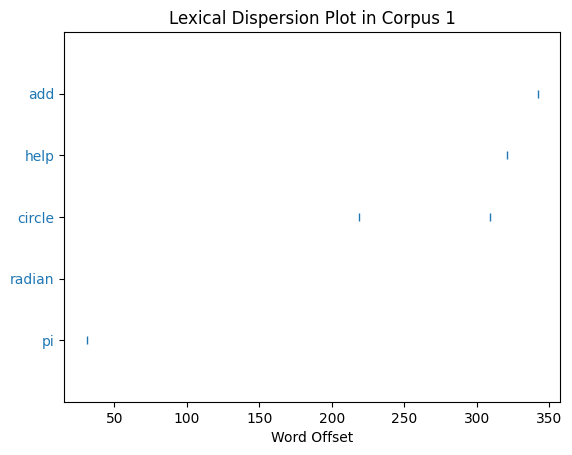

<Figure size 1200x400 with 0 Axes>

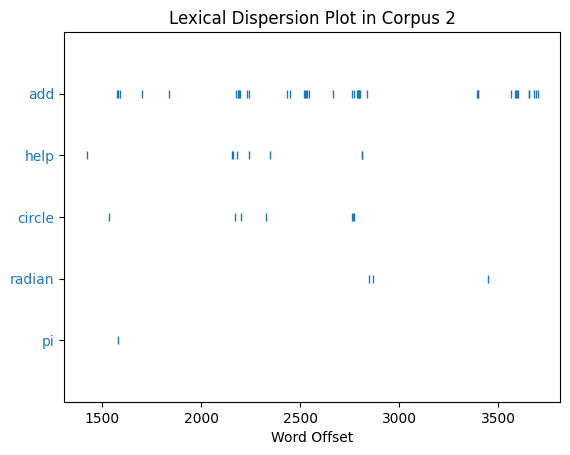

<Figure size 1200x400 with 0 Axes>

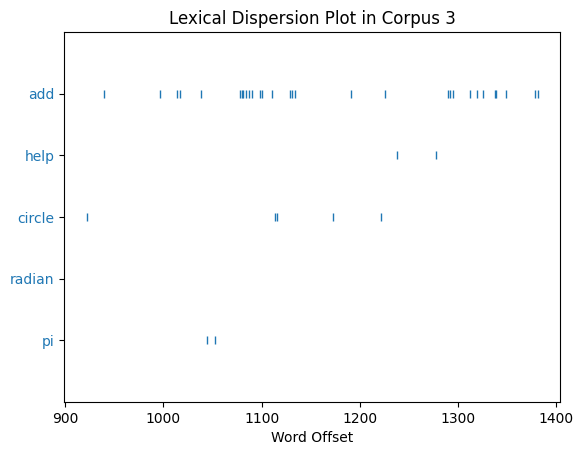

<Figure size 1200x400 with 0 Axes>

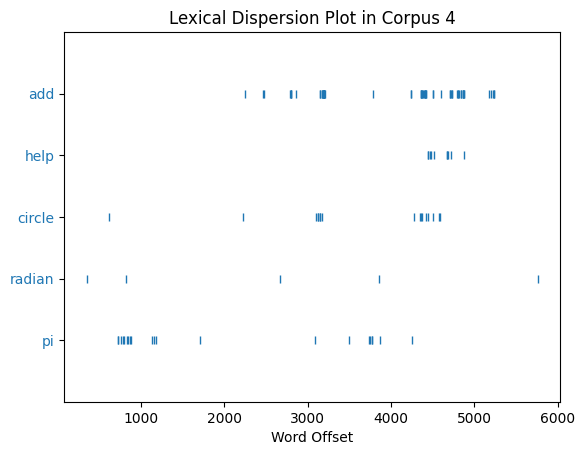

<Figure size 1200x400 with 0 Axes>

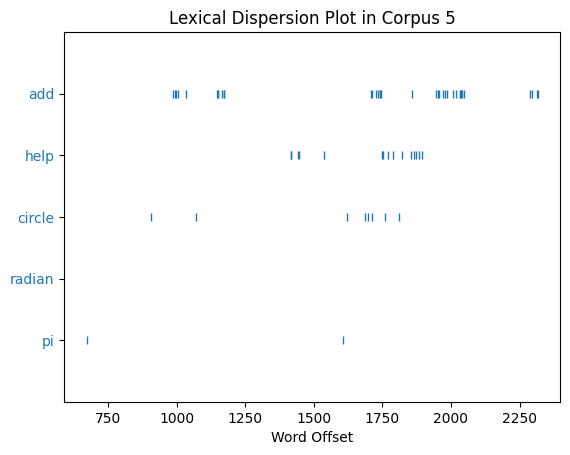

<Figure size 1200x400 with 0 Axes>

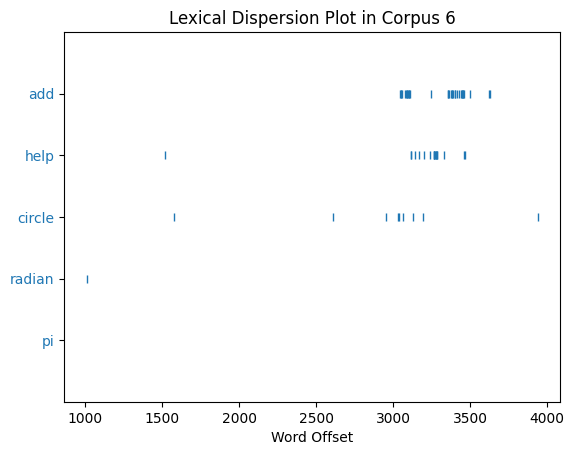

<Figure size 1200x400 with 0 Axes>

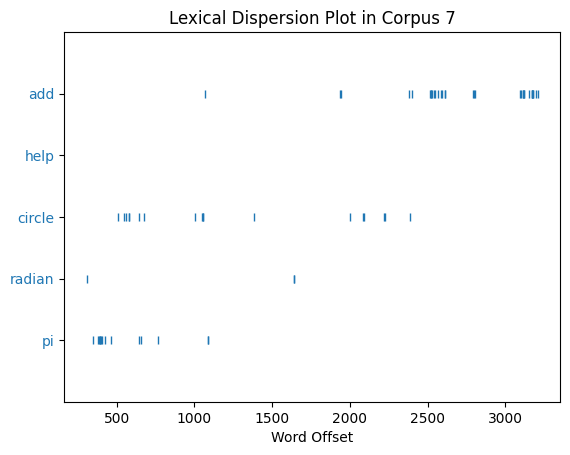

In [ ]:
#Lexical Disperion Plot
import nltk
import matplotlib.pyplot as plt
from nltk.text import Text

# List of words to examine
target_words = ['pi', 'radian', 'circle', 'help', 'add']  # Modify this list as needed

# Generate dispersion plot for each text corpus
plt.figure(figsize=(12, 4))
text_objects_corpus1.dispersion_plot(target_words)
plt.title("Lexical Dispersion Plot in Corpus 1")
plt.show()

plt.figure(figsize=(12, 4))
text_objects_corpus2.dispersion_plot(target_words)
plt.title("Lexical Dispersion Plot in Corpus 2")
plt.show()

plt.figure(figsize=(12, 4))
text_objects_corpus3.dispersion_plot(target_words)
plt.title("Lexical Dispersion Plot in Corpus 3")
plt.show()

plt.figure(figsize=(12, 4))
text_objects_corpus4.dispersion_plot(target_words)
plt.title("Lexical Dispersion Plot in Corpus 4")
plt.show()

plt.figure(figsize=(12, 4))
text_objects_corpus5.dispersion_plot(target_words)
plt.title("Lexical Dispersion Plot in Corpus 5")
plt.show()

plt.figure(figsize=(12, 4))
text_objects_corpus6.dispersion_plot(target_words)
plt.title("Lexical Dispersion Plot in Corpus 6")
plt.show()

plt.figure(figsize=(12, 4))
text_objects_corpus7.dispersion_plot(target_words)
plt.title("Lexical Dispersion Plot in Corpus 7")
plt.show()

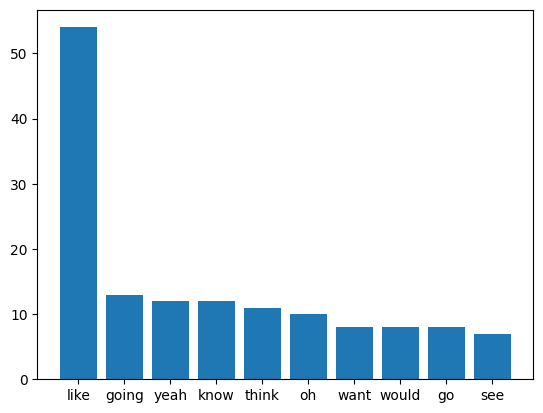

In [ ]:
# Create a frequency distribution

from matplotlib import pyplot as plt

#fd = nltk.FreqDist(tokens_nltk_text)

# Get the 10 most common words and their counts
common = fd1.most_common(10)

# Unzip the words and counts into two separate lists
words, counts = zip(*common)

# Create a bar graph
plt.bar(words, counts)
plt.show()

#4.11 Word Cloud Plot

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming `fd1` is your FreqDist object
word_freq_dict = dict(fd1.most_common())

wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(word_freq_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# 4.2 Heatmap Plot Test

In [ ]:
import pandas as pd
import numpy as np
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

# Assuming `all_results` contains your analysis results for each file,
# and each entry has a 'word_tokens' key with the token list.

# Identify top N words to include in the heatmap
top_n_words = set()
n = 20  # for example, top 20 words

for result in all_results.values():
    fd = FreqDist(result['word_tokens'])
    top_n_words.update(word for word, _ in fd.most_common(n))

# Initialize a DataFrame to store word frequencies across documents
#word_frequencies = pd.DataFrame(columns=top_n_words)
# Convert the set to a list to preserve order
word_frequencies = pd.DataFrame(columns=list(top_n_words))

for file_key, result in all_results.items():
    fd = FreqDist(result['word_tokens'])
    frequencies = {word: fd[word] for word in top_n_words}
    word_frequencies.loc[file_key] = frequencies

# Replace NaN values with 0
word_frequencies.fillna(0, inplace=True)


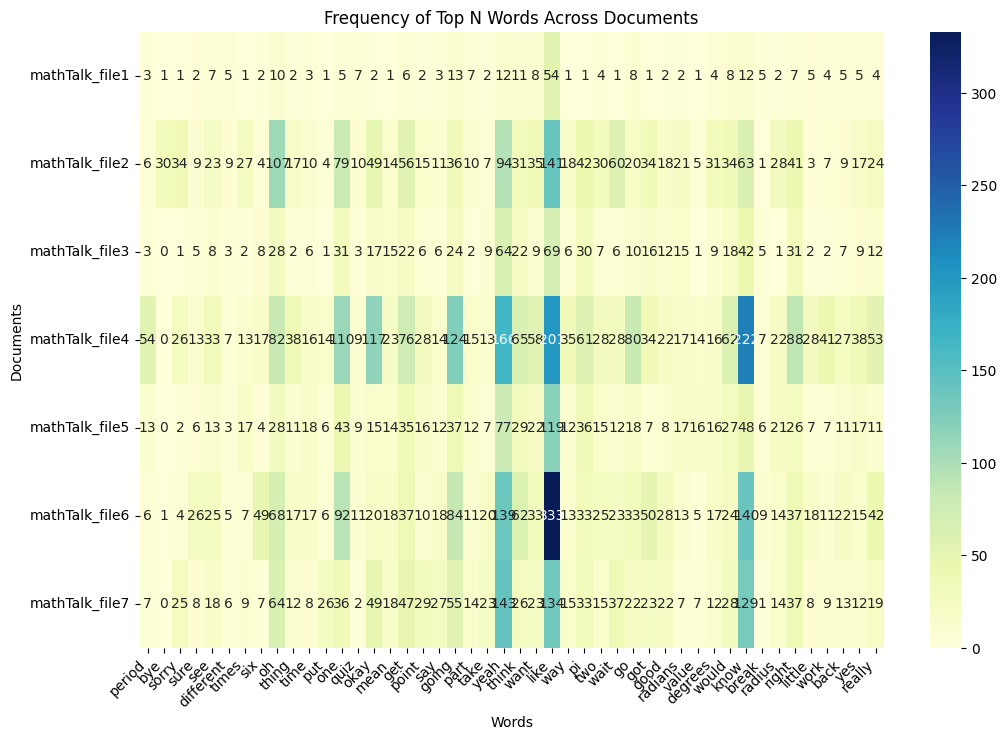

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(word_frequencies, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Frequency of Top N Words Across Documents')
plt.xlabel('Words')
plt.ylabel('Documents')
plt.xticks(rotation=45, ha='right')  # Improve readability of x-axis labels
plt.show()


# 5.1 Bag of Words Frequncy distribution

This will search for each word in the bag of words to find its frequncy in each text corpus.

In [ ]:
import nltk
from nltk.probability import FreqDist
import pandas as pd

# Assuming `all_word_tokens` is a dictionary where keys are corpus names and values are lists of word tokens
# For example:
# all_word_tokens = {
#     'corpus1': ['word1', 'word2', ...],
#     'corpus2': ['word1', 'word2', ...],
#     ...
# }

# Keywords to track across corpora
keywords = ['pi', 'radius', 'equation', 'degrees', 'midline', 'sine', 'cosine', 'tangent', 'function', 'period', 'reflected']

# Initialize a dictionary to hold frequency distributions
freq_distributions = {}

# Calculate frequency distribution for each corpus
for corpus_name, tokens in all_word_tokens.items():
    freq_dist = FreqDist(tokens)
    freq_distributions[corpus_name] = {word: freq_dist[word] for word in keywords}

# Convert the frequency distributions to a DataFrame for easy visualization and analysis
freq_df = pd.DataFrame(freq_distributions)

print(freq_df)


Empty DataFrame
Columns: []
Index: []


# 9.1 Find Sentence by Index Number from Tokenized Text
You can use this function to quickly retrieve specific sentences from the pre-tokenized text corpus, especially when you want to look up sentences for context or additional analysis.

In [ ]:

def search_sentence_by_index(index, original_sentences):
    if 0 <= index < len(original_sentences):
        return original_sentences[index]
    else:
        return "Index out of range."

# Test the function
print(search_sentence_by_index(225, sentence_tokens_corpus1))
# '0' will show the first sentence. Replace '0'' with the index you want to look up from the previous outputs


But yesterday I can't like lift it up.


In [ ]:
def search_sentence_by_index(index, normalized_sentences):
    if 0 <= index < len(normalized_sentences):
        return normalized_sentences[index]
    else:
        return "Index out of range."

# Test the function
print(search_sentence_by_index(225, normalized_sentences_corpus1))
# '0' will show the first sentence. Replace '0'' with the index you want to look up from the previous outputs


yesterday ca like lift
